In [1]:
%matplotlib inline

import scipy as sp
import matplotlib.pyplot as plt
from scipy import randn
from sklearn.cluster import KMeans

X,Y = sp.meshgrid(sp.arange(1,6,dtype=sp.float32),sp.arange(1,6,dtype=sp.float32)); X=X.flatten(); Y=Y.flatten()

In [2]:
ndata=5; nsub=400; nclusters=len(X)
dataX=sp.randn(ndata,nclusters,nsub);dataY=sp.randn(ndata,nclusters,nsub);
for ind in range(len(X)):
    dataX[:,ind,:] += X[ind]; dataY[:,ind,:] += Y[ind];
    

In [3]:
kmeans=KMeans(n_clusters=len(X))

In [4]:
dataX_sub=sp.reshape(dataX,(ndata*nclusters,nsub),order='F')
dataY_sub=sp.reshape(dataY,(ndata*nclusters,nsub),order='F')
# kmeans.fit(sp.squeeze(data[:,:,:,0]))
xx,yy=sp.meshgrid(sp.linspace(0,6,100),sp.linspace(0,6,100))

In [5]:
print dataX_sub.shape, dataY.shape
xx.shape

(125, 400) (5, 25, 400)


(100, 100)

[-0.68415272  0.9987738   3.1187001   0.7807021   1.28269747]
[-0.68415272  0.9987738   3.1187001   0.7807021   1.28269747]


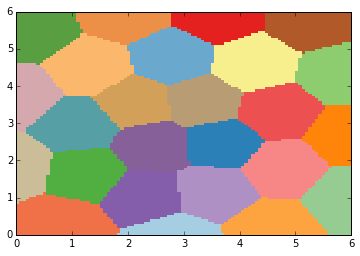

In [6]:
print dataX_sub[:5,0] #, 
print dataX[:5,0,0]
data=sp.vstack([dataX_sub.flatten(),dataY_sub.flatten()]).T
kmeans.fit(data)
Z = kmeans.predict(sp.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
#    plt.clf()
plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

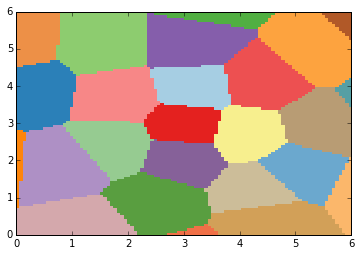

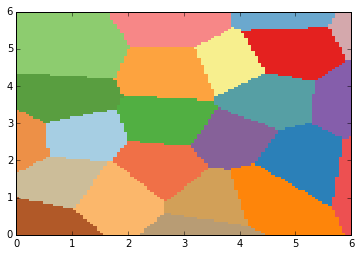

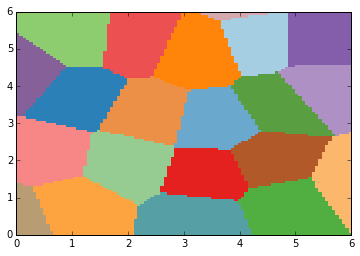

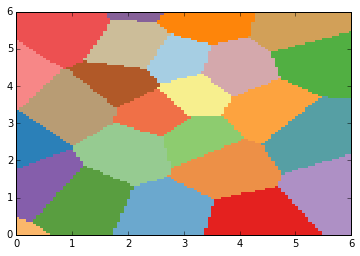

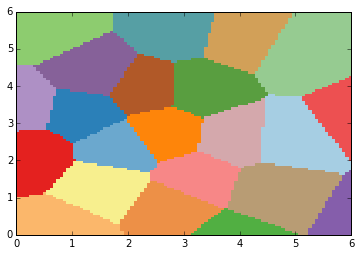

In [7]:
for sub in range(5):
    data=sp.vstack([dataX_sub[:,sub],dataY_sub[:,sub]]).T
    kmeans.fit(data)
    Z = kmeans.predict(sp.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
#    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')